In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
%matplotlib inline

In [2]:
#Explorative functions to remember: df.describe(), df.shape(), df.info()

In [3]:
studentInfo = pd.read_csv('../__DATA__/VLEData/studentInfo.csv')
courses = pd.read_csv('../__DATA__/VLEData/courses.csv')
assessments = pd.read_csv('../__DATA__/VLEData/assessments.csv')
studentAssess = pd.read_csv('../__DATA__/VLEData/studentAssessment.csv')
studentReg = pd.read_csv('../__DATA__/VLEData/studentRegistration.csv')
studentVle = pd.read_csv('../__DATA__/VLEData/studentVle.csv')

In [4]:
studentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [5]:
#How many students are taking more than one online class?
multi = []
for i in studentInfo['id_student'].unique():
    if studentInfo[studentInfo['id_student'] == i].shape[0] > 1:
        multi.append(i)
len(multi)

3538

In [6]:
studentInfo.shape

(32593, 12)

In [7]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [8]:
courses.shape

(22, 3)

In [9]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [10]:
assessments.shape

(206, 6)

In [25]:
studentAssess.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [11]:
studentAssess.shape

(173912, 5)

In [12]:
studentReg.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [13]:
studentReg.shape

(32593, 5)

In [14]:
studentVle.tail(5)

,code_module,code_presentation,id_student,id_site,date,sum_click
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1
10655279,GGG,2014J,654064,896939,269,1


In [15]:
studentVle['code_presentation'].nunique()

4

In [16]:
studentVle.shape

(10655280, 6)

# Merging and Aggregating Data into Master Dataframe

In [4]:
AssessCompo = pd.merge(studentAssess, assessments, how="left", on=['id_assessment'])
AssessCompo['wtadj_score'] = AssessCompo['score'] * AssessCompo['weight']/100
AssessCompo.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,wtadj_score
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,7.8
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0,7.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0,7.2
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0,6.9
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0,7.9


In [18]:
AssessCompo.shape

(173912, 11)

In [19]:
#Too computationally aggressive. Simultaneous slicing and adding to the DF confuses the computer
for i in AssessCompo.index:
    agglist = AssessCompo['mod_agg_score'].isnull()
    if agglist[i] == True:
        Agg = AssessCompo[(AssessCompo['id_student'] == AssessCompo.iloc[i]['id_student']) & 
            (AssessCompo['code_module'] == AssessCompo.iloc[i]['code_module']) & 
            (AssessCompo['code_presentation'] == AssessCompo.iloc[i]['code_presentation'])]
        AssessCompo['mod_agg_score'][Agg.index] = Agg['wtadj_score'].sum()
AssessCompo.head()

KeyError: 'mod_agg_score'

In [6]:
num = 6
AssessCompo[(AssessCompo['id_student'] == AssessCompo.iloc[num]['id_student']) & 
            (AssessCompo['code_module'] == AssessCompo.iloc[num]['code_module']) & 
            (AssessCompo['code_presentation'] == AssessCompo.iloc[num]['code_presentation'])]['wtadj_score'].sum()

72.5

In [6]:
AssessCompo1 = AssessCompo.groupby(['id_student','code_module','code_presentation']).sum()[['weight','wtadj_score']].reset_index()
AssessCompo1.head()

,id_student,code_module,code_presentation,weight,wtadj_score
0,6516,AAA,2014J,100.0,63.50
1,8462,DDD,2013J,40.0,34.90
2,8462,DDD,2014J,50.0,43.00
3,11391,AAA,2013J,100.0,82.40
4,23629,BBB,2013B,25.0,16.69


In [21]:
AssessCompo1.shape

(25843, 5)

In [ ]:
num = 6
AssessCompo[(AssessCompo['id_student'] == AssessCompo.iloc[num]['id_student']) & 
            (AssessCompo['code_module'] == AssessCompo.iloc[num]['code_module']) & 
            (AssessCompo['code_presentation'] == AssessCompo.iloc[num]['code_presentation'])]['wtadj_score'].sum()

In [7]:
student_list = AssessCompo['id_student'].to_list()
def allrecords(stuid,modid,presid):
    SpecProf = AssessCompo[(AssessCompo['id_student'] == stuid) & 
            (AssessCompo['code_module'] == modid) & 
            (AssessCompo['code_presentation'] == presid)]
    return SpecProf

In [8]:
allrecords(23698,'CCC','2014J')

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,wtadj_score
53670,24291,23698,29,0,94.0,CCC,2014J,TMA,32.0,9.0,8.46
55436,24292,23698,109,0,60.0,CCC,2014J,TMA,109.0,22.0,13.20
56923,24293,23698,158,0,69.0,CCC,2014J,TMA,158.0,22.0,15.18
57191,24294,23698,206,0,67.0,CCC,2014J,TMA,207.0,22.0,14.74
58648,24295,23698,21,0,78.0,CCC,2014J,CMA,18.0,2.0,1.56
61120,24296,23698,69,0,93.0,CCC,2014J,CMA,67.0,7.0,6.51
61558,24297,23698,147,0,73.0,CCC,2014J,CMA,144.0,8.0,5.84
63196,24298,23698,219,0,56.0,CCC,2014J,CMA,214.0,8.0,4.48
64812,24299,23698,243,0,80.0,CCC,2014J,Exam,NaN,100.0,80.00


In [13]:
assessment1 = assessments.groupby(['code_module','code_presentation']).sum()['weight'].reset_index().rename(index=str, columns={'weight':'tot_weight'})
assessment1

,code_module,code_presentation,tot_weight
0,AAA,2013J,200.0
1,AAA,2014J,200.0
2,BBB,2013B,200.0
3,BBB,2013J,200.0
4,BBB,2014B,200.0
5,BBB,2014J,200.0
6,CCC,2014B,300.0
7,CCC,2014J,300.0
8,DDD,2013B,200.0
9,DDD,2013J,200.0


In [11]:
AssessCompo[(AssessCompo['code_module'] == 'CCC') & (AssessCompo['code_presentation'] == '2014B')].groupby(['id_student','code_module','code_presentation']).sum().sort_values('wtadj_score', ascending=False).head()

,,,id_assessment,date_submitted,is_banked,score,date,weight,wtadj_score
id_student,code_module,code_presentation,,,,,,,
420935,CCC,2014B,218574,1136,0,900.0,914.0,200.0,200.00
630896,CCC,2014B,218574,1153,0,890.0,914.0,200.0,199.80
548509,CCC,2014B,218574,1116,0,894.0,914.0,200.0,198.94
602042,CCC,2014B,218574,1150,0,894.0,914.0,200.0,198.68
634217,CCC,2014B,218574,1121,0,883.0,914.0,200.0,198.44


In [12]:
assessments[(assessments['code_module']== 'CCC') & (assessments['code_presentation']=='2014B')]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
54,CCC,2014B,24286,CMA,18.0,2.0
55,CCC,2014B,24287,CMA,67.0,7.0
56,CCC,2014B,24288,CMA,137.0,8.0
57,CCC,2014B,24289,CMA,207.0,8.0
58,CCC,2014B,24282,TMA,32.0,9.0
59,CCC,2014B,24283,TMA,102.0,22.0
60,CCC,2014B,24284,TMA,151.0,22.0
61,CCC,2014B,24285,TMA,200.0,22.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0


It appears that the CCC 2014B course had two test versions. Let's see which other courses had multiple exam versions.

In [27]:
#seeing which courses had two exam versions
assessments[assessments['assessment_type'] == 'Exam'].groupby(['code_module','code_presentation']).count()

id_assessment  assessment_type  date  weight
code_module code_presentation                                              
AAA         2013J                          1                1     0       1
            2014J                          1                1     0       1
BBB         2013B                          1                1     0       1
            2013J                          1                1     0       1
            2014B                          1                1     0       1
            2014J                          1                1     0       1
CCC         2014B                          2                2     0       2
            2014J                          2                2     0       2
DDD         2013B                          1                1     1       1
            2013J                          1                1     1       1
            2014B                          1                1     1       1
            2014J                          1                1     0       1
EEE         2013J                          1                1     1       1
            2014B                          1                1     1       1
            2014J                          1                1     1       1
FFF         2013B                          1                1     1       1
            2013J                          1                1     1       1
            2014B                          1                1     1       1
            2014J                          1                1     1       1
GGG         2013J                          1                1     1       1
            2014B                          1                1     1       1
            2014J                          1                1     1       1

It looks like only the CCC class had two exam versions, so we will subtract 100 from the total weight of the class.

In [14]:
assessments[assessments['code_module'] == 'CCC'].drop([62,72])

,code_module,code_presentation,id_assessment,assessment_type,date,weight
54,CCC,2014B,24286,CMA,18.0,2.0
55,CCC,2014B,24287,CMA,67.0,7.0
56,CCC,2014B,24288,CMA,137.0,8.0
57,CCC,2014B,24289,CMA,207.0,8.0
58,CCC,2014B,24282,TMA,32.0,9.0
59,CCC,2014B,24283,TMA,102.0,22.0
60,CCC,2014B,24284,TMA,151.0,22.0
61,CCC,2014B,24285,TMA,200.0,22.0
63,CCC,2014B,40087,Exam,NaN,100.0
64,CCC,2014J,24295,CMA,18.0,2.0


In [15]:
assessment2 = assessments.drop([62,72]).groupby(['code_module','code_presentation']).sum()['weight'].reset_index().rename(index=str, columns={'weight':'tot_weight'})
assessment2

,code_module,code_presentation,tot_weight
0,AAA,2013J,200.0
1,AAA,2014J,200.0
2,BBB,2013B,200.0
3,BBB,2013J,200.0
4,BBB,2014B,200.0
5,BBB,2014J,200.0
6,CCC,2014B,200.0
7,CCC,2014J,200.0
8,DDD,2013B,200.0
9,DDD,2013J,200.0


In [16]:
#Creating feature 'final_score' which is the percentage of all possible points in the course the students achieved
AssessCompo2 = pd.merge(AssessCompo1, assessment2, how='left', on=['code_module','code_presentation'])
AssessCompo2['final_score'] = round(100*AssessCompo2['wtadj_score']/AssessCompo2['tot_weight'], 2)
AssessCompo2.head()

,id_student,code_module,code_presentation,weight,wtadj_score,tot_weight,final_score
0,6516,AAA,2014J,100.0,63.50,200.0,31.75
1,8462,DDD,2013J,40.0,34.90,200.0,17.45
2,8462,DDD,2014J,50.0,43.00,200.0,21.50
3,11391,AAA,2013J,100.0,82.40,200.0,41.20
4,23629,BBB,2013B,25.0,16.69,200.0,8.34


In [31]:
AssessCompo2.shape

(25843, 7)

In [17]:
clicks = studentVle.groupby(['code_module','code_presentation','id_student']).sum()['sum_click'].reset_index()
clicks.head(10)

,code_module,code_presentation,id_student,sum_click
0,AAA,2013J,11391,934
1,AAA,2013J,28400,1435
2,AAA,2013J,30268,281
3,AAA,2013J,31604,2158
4,AAA,2013J,32885,1034
5,AAA,2013J,38053,2445
6,AAA,2013J,45462,1492
7,AAA,2013J,45642,1428
8,AAA,2013J,52130,1894
9,AAA,2013J,53025,3158


In [34]:
clicks.shape

(29228, 4)

In [35]:
clicks[clicks['sum_click'] < 100].shape

(3744, 4)

In [49]:
#Adding the clicks to the composite data frame
#AssessCompo3 = pd.merge(AssessCompo2, clicks, how='left', on=['code_module','code_presentation','id_student'])
#AssessCompo3.head()

,id_student,code_module,code_presentation,weight,wtadj_score,tot_weight,final_score,sum_click
0,6516,AAA,2014J,100.0,63.50,200.0,31.75,2791.0
1,8462,DDD,2013J,40.0,34.90,200.0,17.45,646.0
2,8462,DDD,2014J,50.0,43.00,200.0,21.50,10.0
3,11391,AAA,2013J,100.0,82.40,200.0,41.20,934.0
4,23629,BBB,2013B,25.0,16.69,200.0,8.34,161.0


In [36]:
AssessCompo3.shape

NameError: name 'AssessCompo3' is not defined

In [18]:
StudentComp = pd.merge(studentInfo, AssessCompo2, how='left', on=['code_module','code_presentation','id_student'])
StudentComp.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,weight,wtadj_score,tot_weight,final_score
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,100.0,82.4,200.0,41.20
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,100.0,65.4,200.0,32.70
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,NaN,NaN,NaN,NaN
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,100.0,76.3,200.0,38.15
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,100.0,55.0,200.0,27.50


In [38]:
StudentComp.shape

(32593, 16)

In [39]:
StudentComp.sort_values(by='final_score',ascending=False).head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,weight,wtadj_score,tot_weight,final_score
9020,CCC,2014B,420935,M,South West Region,HE Qualification,40-50%,35-55,0,30,N,Distinction,200.0,200.00,200.0,100.00
10223,CCC,2014B,630896,M,North Region,A Level or Equivalent,40-50%,0-35,0,60,Y,Distinction,200.0,199.80,200.0,99.90
12037,CCC,2014J,631491,M,London Region,Post Graduate Qualification,20-30%,35-55,0,90,N,Distinction,200.0,199.68,200.0,99.84
10974,CCC,2014J,464981,M,Scotland,HE Qualification,80-90%,35-55,0,60,N,Distinction,200.0,199.38,200.0,99.69
10602,CCC,2014J,30850,F,Scotland,HE Qualification,60-70%,35-55,0,120,N,Distinction,200.0,199.24,200.0,99.62


In [19]:
StudentComp1 = pd.merge(StudentComp, clicks, how='left', on=['code_module','code_presentation','id_student'])
StudentComp1.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,weight,wtadj_score,tot_weight,final_score,sum_click
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,100.0,82.4,200.0,41.20,934.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,100.0,65.4,200.0,32.70,1435.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,NaN,NaN,NaN,NaN,281.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,100.0,76.3,200.0,38.15,2158.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,100.0,55.0,200.0,27.50,1034.0


In [41]:
StudentComp1.shape

(32593, 17)

In [20]:
VleFinalDF = pd.merge(StudentComp1, studentReg, how='left', on=['id_student','code_module','code_presentation'])
VleFinalDF.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,weight,wtadj_score,tot_weight,final_score,sum_click,date_registration,date_unregistration
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,100.0,82.4,200.0,41.20,934.0,-159.0,NaN
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,100.0,65.4,200.0,32.70,1435.0,-53.0,NaN
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,NaN,NaN,NaN,NaN,281.0,-92.0,12.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,100.0,76.3,200.0,38.15,2158.0,-52.0,NaN
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,100.0,55.0,200.0,27.50,1034.0,-176.0,NaN


In [224]:
cols = list(VleFinalDF.columns.values)
#cols

In [21]:
cols = ['code_module',
 'code_presentation',
 'id_student',
 'gender',
 'region',
 'highest_education',
 'imd_band',
 'age_band',
 'num_of_prev_attempts',
 'studied_credits',
 'disability',
 'date_registration',
 'date_unregistration',
 'sum_click',
 'final_score',
 'final_result']

In [22]:
CompVle = VleFinalDF[cols]
CompVle.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,date_registration,date_unregistration,sum_click,final_score,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,-159.0,NaN,934.0,41.20,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,-53.0,NaN,1435.0,32.70,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,-92.0,12.0,281.0,NaN,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,-52.0,NaN,2158.0,38.15,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,-176.0,NaN,1034.0,27.50,Pass


In [46]:
CompVle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32593 entries, 0 to 32592
Data columns (total 16 columns):
code_module             32593 non-null object
code_presentation       32593 non-null object
id_student              32593 non-null int64
gender                  32593 non-null object
region                  32593 non-null object
highest_education       32593 non-null object
imd_band                31482 non-null object
age_band                32593 non-null object
num_of_prev_attempts    32593 non-null int64
studied_credits         32593 non-null int64
disability              32593 non-null object
date_registration       32548 non-null float64
date_unregistration     10072 non-null float64
sum_click               29228 non-null float64
final_score             25843 non-null float64
final_result            32593 non-null object
dtypes: float64(4), int64(3), object(9)
memory usage: 4.2+ MB


# Exploring the Data

In [47]:
CompVle.sort_values('final_score',ascending=False)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,date_registration,date_unregistration,sum_click,final_score,final_result
9020,CCC,2014B,420935,M,South West Region,HE Qualification,40-50%,35-55,0,30,N,-25.0,NaN,8504.0,100.00,Distinction
10223,CCC,2014B,630896,M,North Region,A Level or Equivalent,40-50%,0-35,0,60,Y,-45.0,NaN,2307.0,99.90,Distinction
12037,CCC,2014J,631491,M,London Region,Post Graduate Qualification,20-30%,35-55,0,90,N,-74.0,NaN,3938.0,99.84,Distinction
10974,CCC,2014J,464981,M,Scotland,HE Qualification,80-90%,35-55,0,60,N,-81.0,NaN,1703.0,99.69,Distinction
10602,CCC,2014J,30850,F,Scotland,HE Qualification,60-70%,35-55,0,120,N,-56.0,NaN,2258.0,99.62,Distinction
12356,CCC,2014J,652902,M,London Region,HE Qualification,40-50%,0-35,0,120,N,-99.0,NaN,1748.0,99.61,Distinction
9352,CCC,2014B,548509,M,London Region,HE Qualification,70-80%,35-55,0,30,N,-22.0,NaN,2074.0,99.47,Distinction
12342,CCC,2014J,651759,M,London Region,HE Qualification,50-60%,55<=,0,120,N,-84.0,NaN,3528.0,99.34,Distinction
9787,CCC,2014B,602042,M,North Region,Post Graduate Qualification,NaN,35-55,0,30,N,-40.0,NaN,1236.0,99.34,Distinction
10319,CCC,2014B,634217,M,Scotland,Lower Than A Level,70-80%,35-55,0,60,N,-22.0,NaN,1648.0,99.22,Distinction


In [217]:
CompVle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32593 entries, 0 to 32592
Data columns (total 17 columns):
code_module             32593 non-null object
code_presentation       32593 non-null object
id_student              32593 non-null int64
gender                  32593 non-null object
region                  32593 non-null object
highest_education       32593 non-null object
imd_band                31482 non-null object
age_band                32593 non-null object
num_of_prev_attempts    32593 non-null int64
studied_credits         32593 non-null int64
disability              32593 non-null object
date_registration       32548 non-null float64
date_unregistration     10072 non-null float64
sum_click               29228 non-null float64
final_score             25843 non-null float64
final_result            32593 non-null object
clicks_trans            32593 non-null float64
dtypes: float64(5), int64(3), object(9)
memory usage: 4.5+ MB


In [48]:
CompVle.groupby(['final_result']).count()['code_module']

final_result
Distinction     3024
Fail            7052
Pass           12361
Withdrawn      10156
Name: code_module, dtype: int64

In [49]:
CompVle.groupby(['highest_education','final_result']).count()['code_module']

highest_education            final_result
A Level or Equivalent        Distinction     1496
                             Fail            2707
                             Pass            5812
                             Withdrawn       4030
HE Qualification             Distinction      697
                             Fail             790
                             Pass            1960
                             Withdrawn       1283
Lower Than A Level           Distinction      727
                             Fail            3426
                             Pass            4385
                             Withdrawn       4620
No Formal quals              Distinction       16
                             Fail              95
                             Pass              87
                             Withdrawn        149
Post Graduate Qualification  Distinction       88
                             Fail              34
                             Pass             117
        

# Creating Features

Outcome Variable: Final Result
Two Categorical: Highest Education, Index of Multiple Deprivation Band
Four Continuous: Sum Click, Date Registration, Studied Credits, Final Score

Possible Features:
- Interaction between Highest Education and Studied Credits
- Final Score: Rescaling all student performance as a percentage of total possible points available in the course
- Turning number of times repeated into a binary repeated variable
- Log of sum click
- date registration to categorical binary

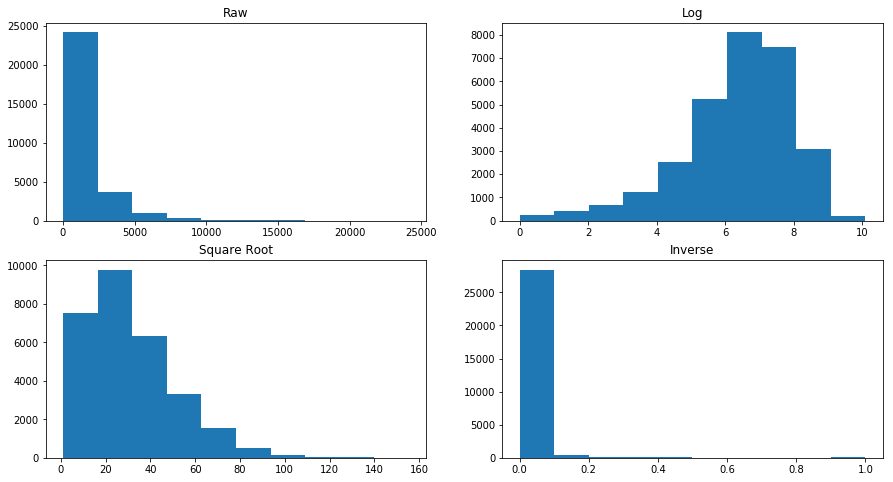

In [50]:
#Visualizing distribution of the sum_clicks for each student
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.hist(CompVle['sum_click'].dropna())
plt.title('Raw')

plt.subplot(2,2,2)
plt.hist(np.log(CompVle['sum_click'].dropna()))
plt.title('Log')

plt.subplot(2,2,3)
plt.hist(np.sqrt(CompVle['sum_click'].dropna()))
plt.title('Square Root')

plt.subplot(2,2,4)
plt.hist(1/CompVle['sum_click'].dropna())
plt.title('Inverse')

plt.show()

In [42]:
#Creating a features data frame and adding the log of sumclick to it
features = pd.DataFrame(np.log(CompVle['sum_click'].fillna(0) + 1))
features = features.rename(columns={'sum_click':'log_sum_click'})
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32593 entries, 0 to 32592
Data columns (total 1 columns):
log_sum_click    32593 non-null float64
dtypes: float64(1)
memory usage: 509.3 KB


In [43]:
mod_presentation = CompVle['code_module'] + CompVle['code_presentation']
mod_presentation = mod_presentation.to_frame(name='mod_presentation')
mod_presentation.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32593 entries, 0 to 32592
Data columns (total 1 columns):
mod_presentation    32593 non-null object
dtypes: object(1)
memory usage: 509.3+ KB


In [44]:
features['mod_presentation'] = mod_presentation['mod_presentation']
features.head()

,log_sum_click,mod_presentation
0,6.840547,AAA2013J
1,7.269617,AAA2013J
2,5.641907,AAA2013J
3,7.677400,AAA2013J
4,6.942157,AAA2013J


In [197]:
#This is was only necessary before you realized indexes can actually have their datatype changed.
#features = pd.merge(features, mod_presentation, how = 'inner', on='index')
#features.head()


In [185]:
#pd.concat([features, mod_presentation], axis = 1, ignore_index=False)
#features['mod_presentation'] = ''
#for i in mod_presentation.index:
#    features['mod_presentation'][i] = mod_presentation.iloc[i][0]
#features.head()

In [198]:
CompVle['imd_band'].unique()

array(['90-100%', '20-30%', '30-40%', '50-60%', '80-90%', '70-80%', nan,
       '60-70%', '40-50%', '10-20', '0-10%'], dtype=object)

In [45]:
features['imd_band'] = CompVle['imd_band']
features.head()

,log_sum_click,mod_presentation,imd_band
0,6.840547,AAA2013J,90-100%
1,7.269617,AAA2013J,20-30%
2,5.641907,AAA2013J,30-40%
3,7.677400,AAA2013J,50-60%
4,6.942157,AAA2013J,50-60%


In [46]:
features['imd_band'] = features['imd_band'].replace({ '90-100%': 95 , '20-30%': 25 , '30-40%': 35 , '50-60%': 55 , '80-90%': 85, '70-80%': 75,
       '60-70%': 65, '40-50%' : 45 , '10-20' : 15, '0-10%': 5})
features.head()

,log_sum_click,mod_presentation,imd_band
0,6.840547,AAA2013J,95.0
1,7.269617,AAA2013J,25.0
2,5.641907,AAA2013J,35.0
3,7.677400,AAA2013J,55.0
4,6.942157,AAA2013J,55.0


In [47]:
features['age_band'] = CompVle['age_band']
features['age_band'] = features['age_band'].replace({'55<=': 2 , '35-55' : 1 , '0-35' : 0})
features.head()

,log_sum_click,mod_presentation,imd_band,age_band
0,6.840547,AAA2013J,95.0,2
1,7.269617,AAA2013J,25.0,1
2,5.641907,AAA2013J,35.0,1
3,7.677400,AAA2013J,55.0,1
4,6.942157,AAA2013J,55.0,0


In [231]:
CompVle['age_band'].unique()

array(['55<=', '35-55', '0-35'], dtype=object)

In [48]:
#Preprocessing and Scaling imd_band
float_array = features['log_sum_click'].values.astype(float).reshape(-1, 1)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
CompVlePP['clicks_scaled'] = pd.DataFrame(scaled_array)
CompVlePP.head()

,AAA,BBB,CCC,DDD,EEE,FFF,GGG,2013B,2013J,2014B,...,HE Qualification,Lower Than A Level,No Formal quals,Post Graduate Qualification,clicks_scaled,imd_band,age_band,reattempted,studied_credits,disability
0,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0.677844,1.000000,2,0,0.336,0
1,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0.720361,0.222222,1,0,0.048,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0.559068,0.333333,1,0,0.048,1
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0.760769,0.555556,1,0,0.048,0
4,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0.687913,0.555556,0,0,0.048,0


In [49]:
#Preprocessing and Scaling log sum click
float_array = features['imd_band'].values.astype(float).reshape(-1, 1)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
CompVlePP['imd_band'] = pd.DataFrame(scaled_array)

In [245]:
#Binarizing the number of attempts for the course
X = CompVle['num_of_prev_attempts'].values.reshape(-1,1)
Binarize = preprocessing.Binarizer(0)
binary_array = Binarize.fit_transform(X)
features['reattempted'] = pd.DataFrame(binary_array)
#features.loc[features['reattempted'] > 0]

In [219]:
CompVlePP = pd.get_dummies(CompVle['code_module'])
CompVlePP = pd.concat([CompVlePP, pd.get_dummies(CompVle['code_presentation'])], axis = 1)
#CompVlePP = pd.concat([CompVlePP, pd.get_dummies(features['mod_presentation'])], axis = 1)
CompVlePP = pd.concat([CompVlePP, pd.get_dummies(CompVle['region'])], axis = 1)
CompVlePP = pd.concat([CompVlePP, pd.get_dummies(CompVle['gender'])], axis = 1)
CompVlePP = pd.concat([CompVlePP, pd.get_dummies(CompVle['highest_education'])], axis = 1)
#CompVlePP = pd.concat([CompVlePP, CompVle['sum_click']], axis = 1)

#Preprocessing and Scaling log sum click
#float_array = features['log_sum_click'].values.astype(float).reshape(-1, 1)
#min_max_scaler = preprocessing.MinMaxScaler()
#scaled_array = min_max_scaler.fit_transform(float_array)
#CompVlePP['clicks_scaled'] = pd.DataFrame(scaled_array)

#Preprocessing Clicks to be powertransformed
clicks = (CompVle['sum_click'].fillna(0)).values.reshape(-1,1)
click_trans = preprocessing.power_transform(clicks, method = 'yeo-johnson')
clicktdf = pd.DataFrame(click_trans)
CompVlePP['clicks_trans'] = clicktdf

#Preprocessing and Scaling log imd_band
float_array = features['imd_band'].values.astype(float).reshape(-1, 1)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
CompVlePP['imd_band'] = pd.DataFrame(scaled_array)

CompVlePP['age_band'] = features['age_band']

#Binarizing the number of attempts for the course
X = CompVle['num_of_prev_attempts'].values.reshape(-1,1)
Binarize = preprocessing.Binarizer(0)
binary_array = Binarize.fit_transform(X)
CompVlePP['reattempted'] = pd.DataFrame(binary_array)

#Rescaling the studied_credits column
float_array = CompVle['studied_credits'].values.astype(float).reshape(-1, 1)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
CompVlePP['studied_credits'] = pd.DataFrame(scaled_array)

#Binarizing Disability
binary_disability = CompVle['disability'].replace({'Y':1,'N':0})
CompVlePP['disability'] = pd.DataFrame(binary_disability)

#Adding the Final Score Outcome Variable to the dataframe
CompVlePP = pd.concat([CompVlePP, CompVle['final_score']], axis = 1)

#Filling in missing values
CompVlePP['final_score'] = CompVlePP['final_score'].fillna(0)
CompVlePP['imd_band'] = CompVlePP['imd_band'].fillna(CompVlePP['imd_band'].mean())
CompVlePP['clicks_trans'] = CompVlePP['clicks_trans'].fillna(CompVlePP['clicks_trans'].min())
#CompVlePP['sum_click'] = CompVlePP['sum_click'].fillna(0)


CompVlePP.head()


,AAA,BBB,CCC,DDD,EEE,FFF,GGG,2013B,2013J,2014B,...,Lower Than A Level,No Formal quals,Post Graduate Qualification,clicks_trans,imd_band,age_band,reattempted,studied_credits,disability,final_score
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0.338121,1.000000,2,0,0.336,0,41.20
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0.624849,0.222222,1,0,0.048,0,32.70
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,-0.323779,0.333333,1,0,0.048,1,0.00
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0.925874,0.555556,1,0,0.048,0,38.15
4,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0.403401,0.555556,0,0,0.048,0,27.50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 1 columns):
0    32593 non-null float64
dtypes: float64(1)
memory usage: 254.7 KB
None
                  0
count  3.259300e+04
mean   1.953322e-16
std    1.000015e+00
min   -1.797147e+00
25%   -6.215755e-01
50%    7.510045e-02
75%    6.957253e-01
max    3.446909e+00


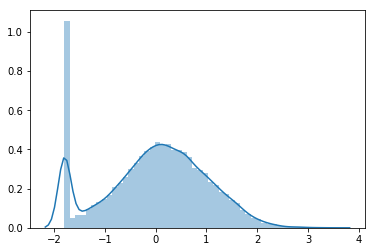

In [145]:
clicks = (CompVle['sum_click'].fillna(1)).values.reshape(-1,1)
click_trans = preprocessing.power_transform(clicks, method = 'box-cox')
clicktdf = pd.DataFrame(click_trans)
sns.distplot(clicktdf.values)
print(clicktdf.info())
print(clicktdf.describe())

clicks = (CompVlePP['clicks_scaled'].dropna()).values.reshape(-1,1)
click_trans = preprocessing.power_transform(clicks, method = 'yeo-johnson')
clicklogtdf = pd.DataFrame(click_trans)
sns.distplot(clicklogtdf.values)
print(clicklogtdf.info())
print(clicklogtdf.describe())

In [38]:
clicktdf.describe()

,0
count,2.922800e+04
mean,-1.244690e-16
std,1.000017e+00
min,-2.510462e+00
25%,-6.610607e-01
50%,3.686035e-03
75%,6.866252e-01
max,3.691763e+00


# Dimension Reduction using PCA; and supervised learning model testing

In [62]:
from sklearn.decomposition import PCA

In [205]:
CompVlePP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32593 entries, 0 to 32592
Data columns (total 39 columns):
AAA                            32593 non-null uint8
BBB                            32593 non-null uint8
CCC                            32593 non-null uint8
DDD                            32593 non-null uint8
EEE                            32593 non-null uint8
FFF                            32593 non-null uint8
GGG                            32593 non-null uint8
2013B                          32593 non-null uint8
2013J                          32593 non-null uint8
2014B                          32593 non-null uint8
2014J                          32593 non-null uint8
East Anglian Region            32593 non-null uint8
East Midlands Region           32593 non-null uint8
Ireland                        32593 non-null uint8
London Region                  32593 non-null uint8
North Region                   32593 non-null uint8
North Western Region           32593 non-null uint8
Scotlan

In [206]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(CompVlePP.iloc[:,0:37].values)
principalComponents

array([[-2.81140933e+02, -5.74552221e-01, -9.31288109e-03, ...,
        -4.03000270e-01, -1.87621736e-01, -1.90388267e-01],
       [ 2.19859025e+02,  6.38338784e-01, -2.85840510e-01, ...,
         4.74366898e-02, -3.12315573e-01,  6.47090246e-01],
       [-9.34141311e+02,  6.07112194e-01, -7.22526223e-01, ...,
        -5.23960507e-02, -3.22994086e-01, -6.55371177e-01],
       ...,
       [-9.03141348e+02,  5.04740784e-01, -8.22444186e-01, ...,
         2.28221719e-01, -2.69638696e-01, -3.55518123e-01],
       [-9.40141340e+02,  6.81154605e-01,  4.64254297e-01, ...,
         1.83405722e-02, -2.03428590e-01, -7.21739171e-01],
       [-5.99141158e+02,  5.56697563e-01, -2.43801266e-01, ...,
        -3.81227276e-02, -1.43396527e-01,  2.09577617e-01]])

In [207]:
principalDf = pd.DataFrame(data = principalComponents , columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
principalDf.head()

,1,2,3,4,5,6,7,8,9,10
0,-281.140933,-0.574552,-0.009313,-0.825646,-0.301584,0.000446,2.075746,-0.403000,-0.187622,-0.190388
1,219.859025,0.638339,-0.285841,-0.861084,-0.241513,-0.087267,1.276296,0.047437,-0.312316,0.647090
2,-934.141311,0.607112,-0.722526,-0.080148,-0.556916,-0.333190,0.642041,-0.052396,-0.322994,-0.655371
3,942.859067,0.691132,-0.914516,-0.451570,-0.484862,-0.257689,0.625262,0.004789,-0.382090,-0.546412
4,-181.141108,0.697912,0.321104,-0.872354,-0.470235,-0.416817,-0.241734,0.341130,-0.463596,0.018158


In [208]:
finalDf = pd.concat([principalDf, CompVle['final_score']], axis = 1)
finalDf = finalDf.fillna(0)
finalDf.head()

,1,2,3,4,5,6,7,8,9,10,final_score
0,-281.140933,-0.574552,-0.009313,-0.825646,-0.301584,0.000446,2.075746,-0.403000,-0.187622,-0.190388,41.20
1,219.859025,0.638339,-0.285841,-0.861084,-0.241513,-0.087267,1.276296,0.047437,-0.312316,0.647090,32.70
2,-934.141311,0.607112,-0.722526,-0.080148,-0.556916,-0.333190,0.642041,-0.052396,-0.322994,-0.655371,0.00
3,942.859067,0.691132,-0.914516,-0.451570,-0.484862,-0.257689,0.625262,0.004789,-0.382090,-0.546412,38.15
4,-181.141108,0.697912,0.321104,-0.872354,-0.470235,-0.416817,-0.241734,0.341130,-0.463596,0.018158,27.50


In [209]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [210]:
X_pca = finalDf[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']].values
y =  finalDf['final_score'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [211]:
lreg = LinearRegression()
lreg.fit(X_train,y_train)
pred = lreg.predict(X_test)
print (len(y_test), len(pred))

6519 6519


In [212]:
#import sklearn
#acc = sklearn.metrics.accuracy_score(y_test, pred)

In [213]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.49962703515990825

In [191]:
y_test[:5]

array([34.26,  8.88, 26.38, 78.34, 42.75])

In [192]:
pred[:5]

array([47.92004877, 13.67309812, 39.45139715, 33.77382588, 44.48540852])

# Feature Selection by correlation to target variable

In [196]:
CompVlePP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32593 entries, 0 to 32592
Data columns (total 38 columns):
AAA                            32593 non-null uint8
BBB                            32593 non-null uint8
CCC                            32593 non-null uint8
DDD                            32593 non-null uint8
EEE                            32593 non-null uint8
FFF                            32593 non-null uint8
GGG                            32593 non-null uint8
2013B                          32593 non-null uint8
2013J                          32593 non-null uint8
2014B                          32593 non-null uint8
2014J                          32593 non-null uint8
East Anglian Region            32593 non-null uint8
East Midlands Region           32593 non-null uint8
Ireland                        32593 non-null uint8
London Region                  32593 non-null uint8
North Region                   32593 non-null uint8
North Western Region           32593 non-null uint8
Scotlan

In [216]:
corrmat = CompVlePP.corr()
corrmat.iloc[38,:].sort_values(ascending=False)
#top_corr_features = corrmat.index
#plt.figure(figsize=(20,20))
#plot heat map
#g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

final_score                    1.000000
clicks_trans                   0.642185
sum_click                      0.470450
DDD                            0.216669
imd_band                       0.148280
HE Qualification               0.130406
M                              0.109296
CCC                            0.097796
A Level or Equivalent          0.094907
Post Graduate Qualification    0.081028
2014J                          0.050715
North Region                   0.046366
Scotland                       0.046335
age_band                       0.036388
Ireland                        0.036041
EEE                            0.029599
AAA                            0.026163
South Region                   0.022254
2013B                          0.012795
South West Region              0.008008
South East Region              0.006063
Wales                         -0.001205
East Anglian Region           -0.001640
East Midlands Region          -0.019758
2013J                         -0.020401


# Feature Selection using Embedded Method (Lasso)

In [221]:
from sklearn.linear_model import LassoCV

In [223]:
X = CompVlePP.iloc[:,0:37]
y = CompVlePP.iloc[:,37]
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 0.317978
Best score using built-in LassoCV: 0.559419


In [224]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 9 variables and eliminated the other 28 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

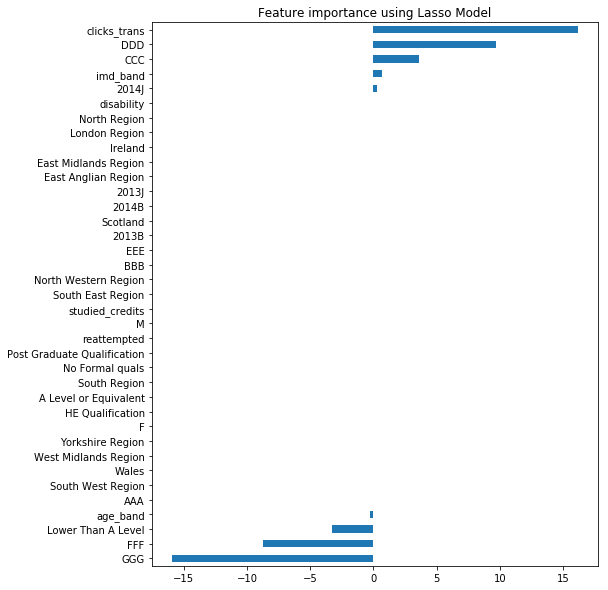

In [225]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")